importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load Dataset

In [2]:
df1 = pd.read_csv("train.csv")
df2 = pd.read_csv("test.csv")

In [3]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df1.shape

(891, 12)

In [5]:
df2.shape

(418, 11)

In [6]:
df1['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [7]:
#Survived column is not common in both data set so we will drop
X = df1.drop('Survived',axis = 1)
Y = df1.iloc[:,1]


In [8]:
# we will concat two data set by row wise
data = pd.concat([X,df2],axis = 0)

In [9]:
data = data.set_index('PassengerId')

In [10]:
data.shape

(1309, 10)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1308 non-null   float64
 8   Cabin     295 non-null    object 
 9   Embarked  1307 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 112.5+ KB


by info we get that 
1. there is 5 columns as are catogorical 
2. null value 

In [12]:
data.describe()

,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,80.000000,8.000000,9.000000,512.329200


In [13]:
data.isnull().sum()

Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

Observation :
1. Age have null values we fill with mean value of age
2. we will drop cabin column

In [14]:
#droping cabin column
data = data.drop(['Cabin'],axis = 1)

In [15]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [16]:
data.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,C


In [17]:
#filling the null value with mean value and 
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())
data['Embarked'] = data['Embarked'].fillna('S')

In [18]:
data.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [19]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [20]:
#Sex is catogorical value 
data.Sex = pd.get_dummies(data['Sex'],drop_first=True)


In [21]:
data.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [22]:
my_emb = {
    'S':0,
    'C':1,
    'Q':2
}

In [23]:
data['EmbarkedNew'] = data['Embarked'].map(my_emb)

In [24]:
data=data.drop('Embarked',axis = 1)

In [25]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,EmbarkedNew
PassengerId,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1
3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0
5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0


In [26]:
import seaborn as sns


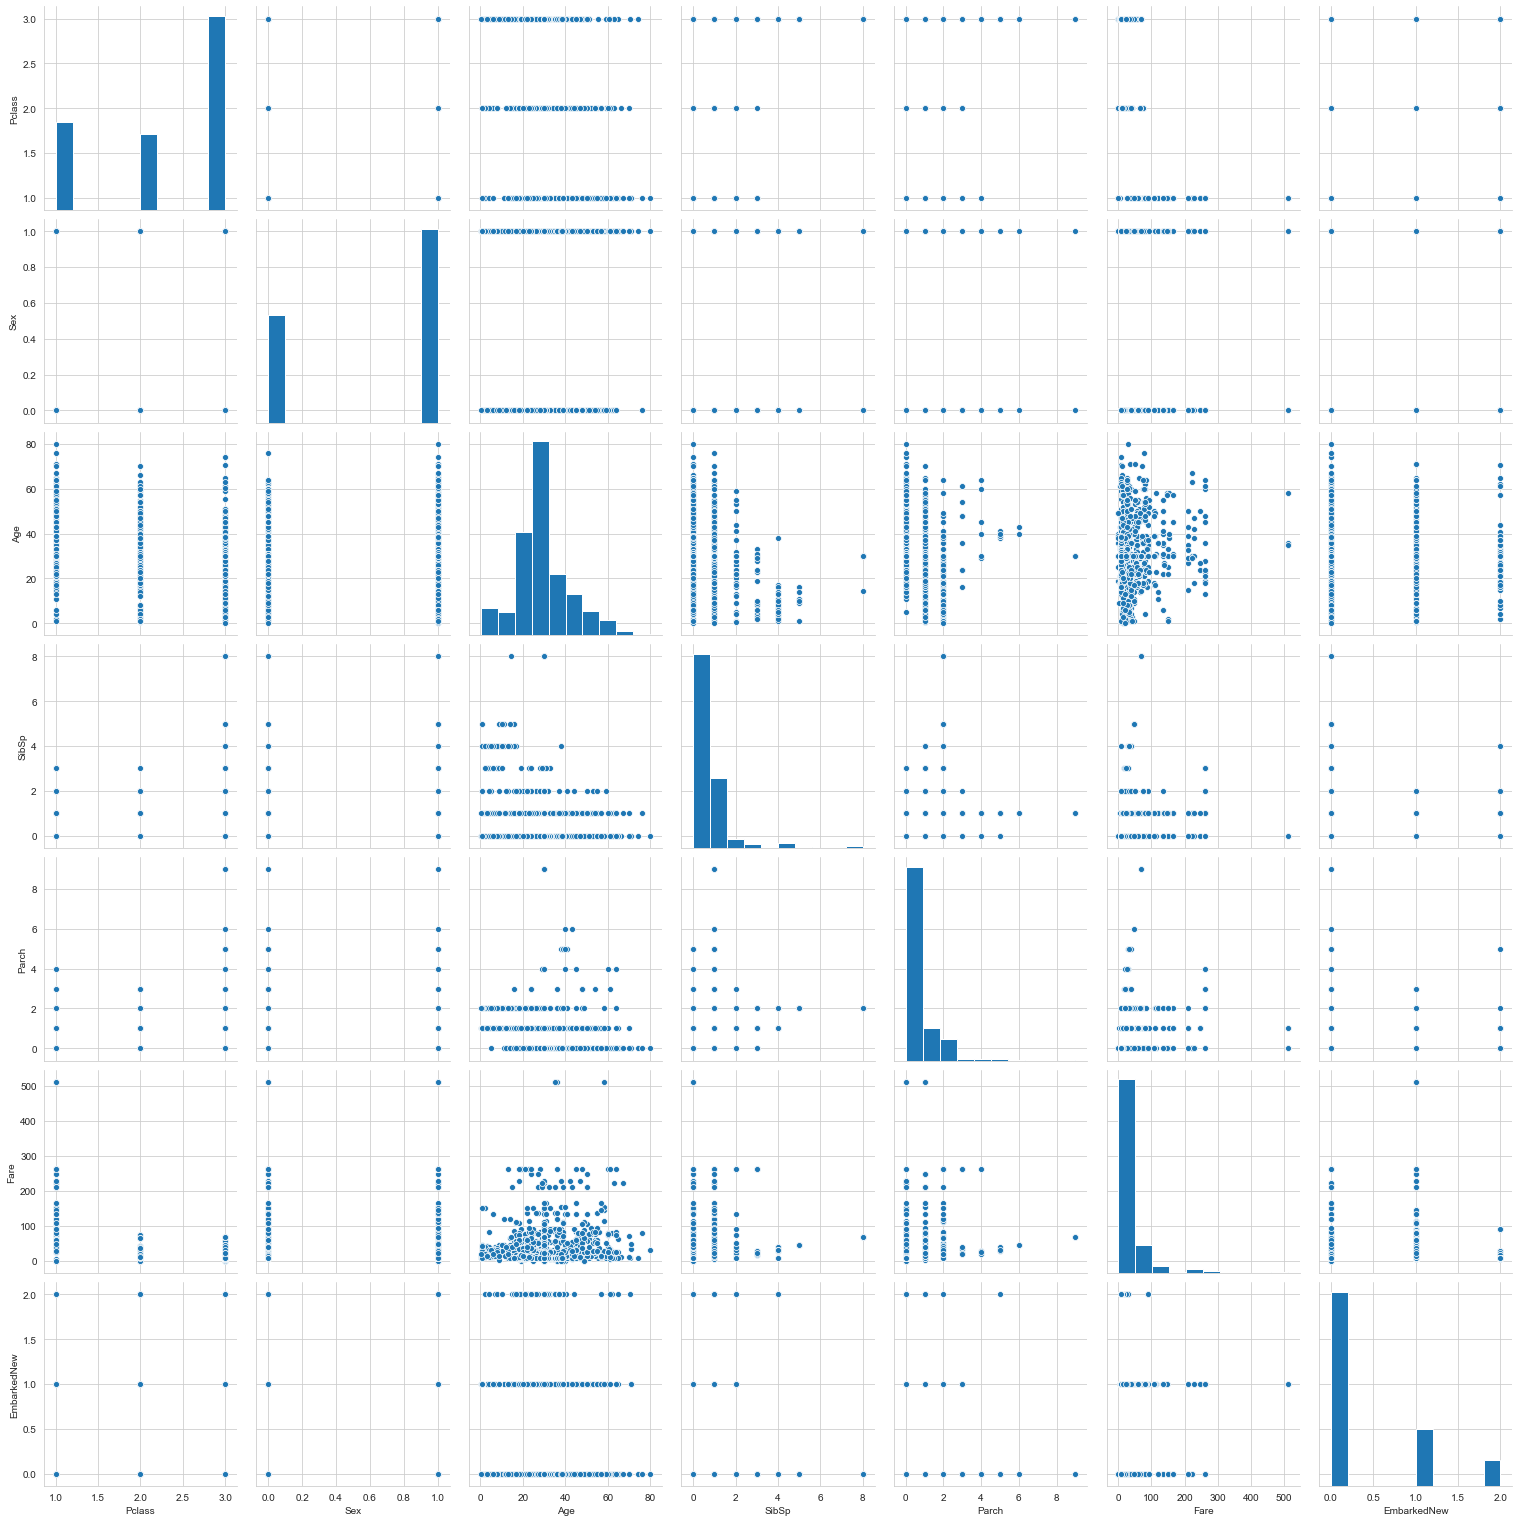

In [28]:

# pairwise scatter plot: Pair-Plot

sns.set_style("whitegrid")
sns.pairplot(data,height=3)
plt.show()


In [29]:
data.corr()

,Pclass,Sex,Age,SibSp,Parch,Fare,EmbarkedNew
Pclass,1.000000,0.124617,-0.366371,0.060832,0.018322,-0.558477,0.038875
Sex,0.124617,1.000000,0.057397,-0.109609,-0.213125,-0.185484,-0.120423
Age,-0.366371,0.057397,1.000000,-0.190747,-0.130872,0.171521,0.035824
SibSp,0.060832,-0.109609,-0.190747,1.000000,0.373587,0.160224,-0.073461
Parch,0.018322,-0.213125,-0.130872,0.373587,1.000000,0.221522,-0.095523
Fare,-0.558477,-0.185484,0.171521,0.160224,0.221522,1.000000,0.061118
EmbarkedNew,0.038875,-0.120423,0.035824,-0.073461,-0.095523,0.061118,1.000000


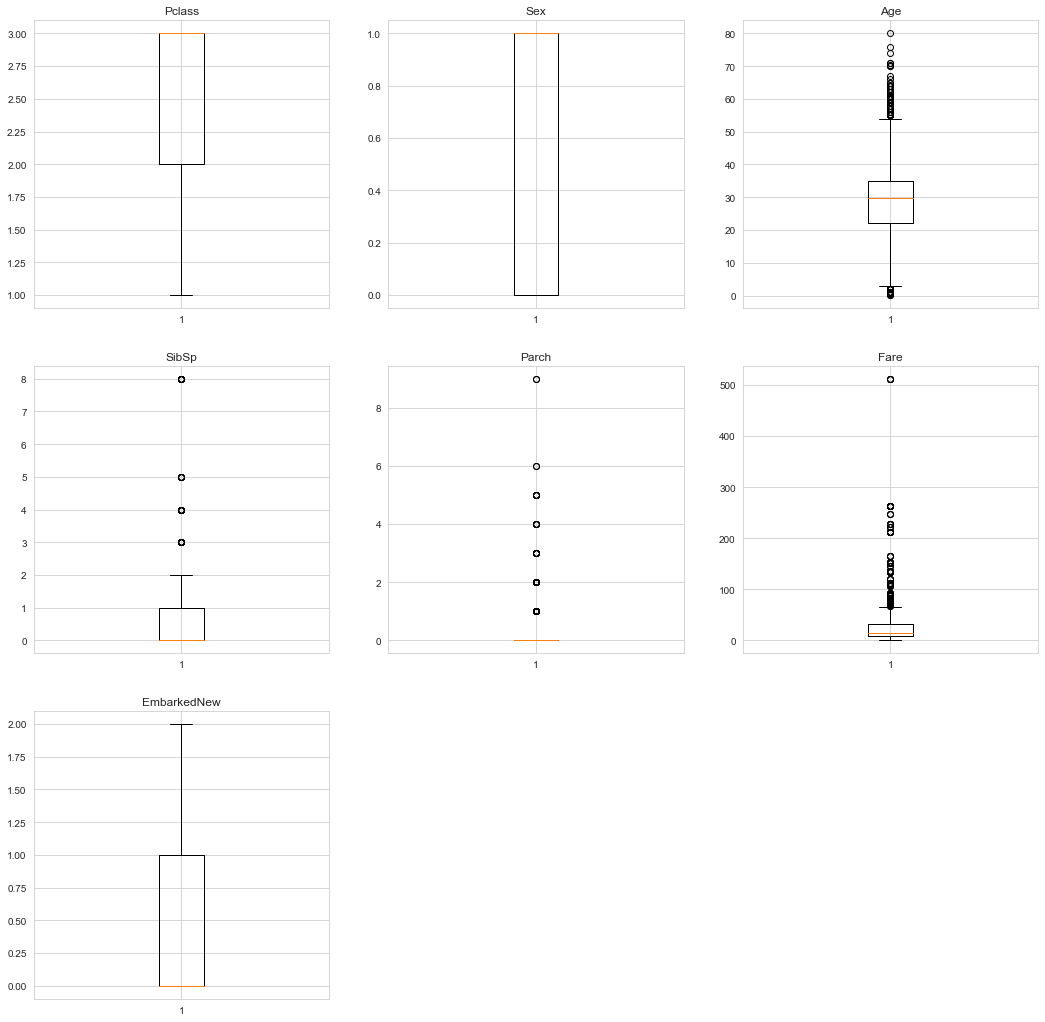

In [30]:
def detect_outliers():
    count = 1
    plt.figure(figsize = (18,18))
    for col in data.columns[:]:
        if(data[col].dtype!='O'):
            plt.subplot(3,3,count)
            plt.boxplot(data[col])
            plt.title(col)
            count += 1
    #show the fig
    plt.show()

#function call to detect outliers
detect_outliers()

In [31]:
data.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'EmbarkedNew'],
      dtype='object')

In [32]:

#removing outliers
def remove_outlier(data_in, col_name):
    q1 = data_in[col_name].quantile(0.25)
    q3 = data_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    data_out = data_in.loc[(data_in[col_name] > fence_low) & (data_in[col_name] < fence_high)]
    return data_out

In [33]:
for col in data.columns:
    if(data[col].dtype!='O'):
        if((col=='Age') or (col=='Fare')):
            data = remove_outlier(data,col)

In [34]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,EmbarkedNew
PassengerId,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,0
3,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,0
5,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,0
6,3,"Moran, Mr. James",1,29.881138,0,0,330877,8.4583,2


In [35]:
data.shape

(1055, 9)

In [36]:
x = data.loc[:,['Pclass','Sex','Age','Fare','EmbarkedNew']]
x1_train = x.iloc[:891]
print(x1_train.index.size)
x1_test = x.iloc[876:]
print(x1_test.index.size)

891
179


In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x1_train,Y,test_size = 0.2,random_state=0)

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x1_test)

In [39]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [40]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
y_pred = model.predict(x1_test)

In [42]:
print(x_test.shape)
print(y_test.shape)


(179, 5)
(179,)


In [43]:

dict1 = {
    "Y_test":y_test,
    "Y_pred":y_pred
}
eval_df = pd.DataFrame(dict1)

In [44]:
eval_df

,Y_test,Y_pred
495,0,1
648,0,0
278,0,0
31,1,1
255,1,0
...,...,...
780,1,1
837,0,1
215,1,1
833,0,1


In [45]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [46]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[37, 73],
       [20, 49]], dtype=int64)

In [47]:
accuracy_score(y_test,y_pred)

0.48044692737430167